continuous_probabilistic_methods.py or continuous_probabilistic_methods.ipynb 1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import iqr
from numpy import mean, std

1. Using lemonade.csv dataset and focusing on continuous variables:

    - Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?
    - Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?
    - Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?
    - Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [2]:
df = pd.read_csv('lemonade.csv')

In [3]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [18]:
#df.set_index('Date', inplace=True)

In [19]:
#df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
1/1/17,Sunday,27.0,2.00,15,0.5,10
1/2/17,Monday,28.9,1.33,15,0.5,13
1/3/17,Tuesday,34.5,1.33,27,0.5,15
1/4/17,Wednesday,44.1,1.05,28,0.5,17
1/5/17,Thursday,42.4,1.00,33,0.5,18


In [4]:
df.shape

(365, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
Date           365 non-null object
Day            365 non-null object
Temperature    365 non-null float64
Rainfall       365 non-null float64
Flyers         365 non-null int64
Price          365 non-null float64
Sales          365 non-null int64
dtypes: float64(3), int64(2), object(2)
memory usage: 20.0+ KB


In [6]:
df.describe()
# interesting story looking at rainfall, do a sanity check
# flyers -- aren't recollecting flyers?
# temp max is wayyy too high
# sales max is outrageously higher than the other quartiles -- interesting
# graph out these columns to look at outliers -- sanity checks 

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.589041
std,18.085892,0.273890,13.786445,0.0,29.979680
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [7]:
df.columns

Index(['Date', 'Day', 'Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'], dtype='object')

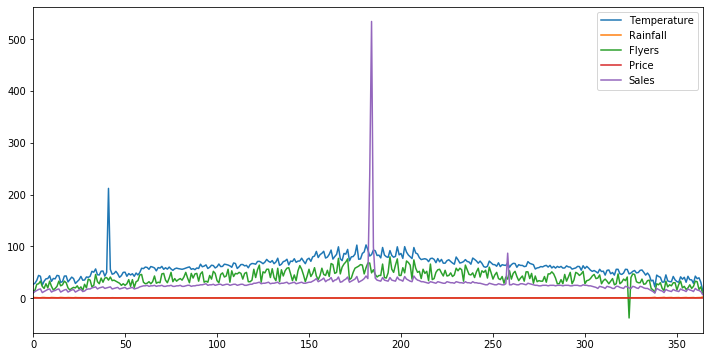

In [8]:
df.plot(figsize=(12,6))
plt.show()

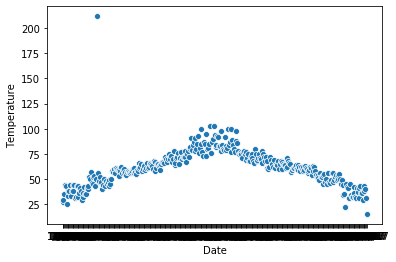

In [9]:
sns.scatterplot(data=df, x='Date', y='Temperature')
plt.show()

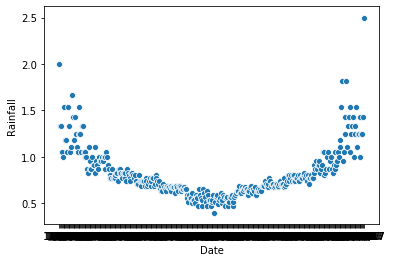

In [10]:
sns.scatterplot(data=df, x='Date', y='Rainfall')
plt.show()

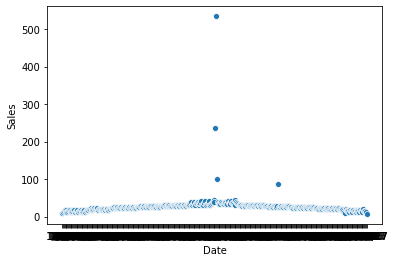

In [11]:
sns.scatterplot(data=df, x='Date', y='Sales')
plt.show()

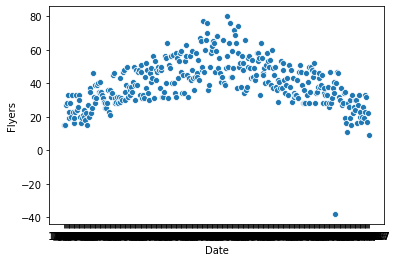

In [12]:
sns.scatterplot(data=df, x='Date', y='Flyers')
plt.show()

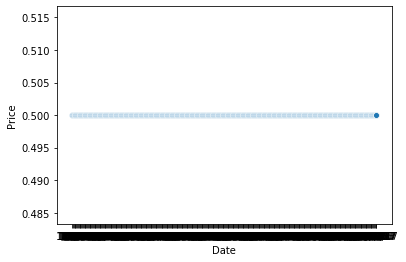

In [13]:
sns.scatterplot(data=df, x='Date', y='Price')
plt.show()
# price is static, no outliers

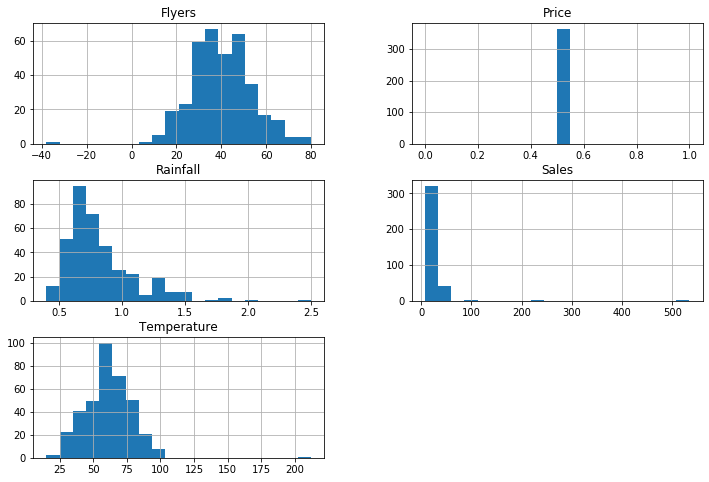

In [14]:
df.hist(figsize=(12,8), bins=20)
plt.show()

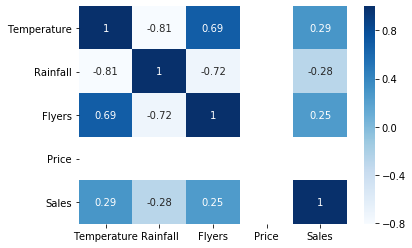

In [15]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

In [22]:
# create function to find upper and lower bounds
def get_lower_and_upper_bounds(series, multiplier = 1.5):
    q1 = series.quantile(.25)
    q3 = series.quantile(.75)
    iqr = q3 - q1
    upper_bound = q3 + multiplier * iqr
    lower_bound = q1 - multiplier * iqr
    return upper_bound, lower_bound

In [23]:
get_lower_and_upper_bounds(df.Temperature)

(104.7, 16.700000000000003)

In [24]:
get_lower_and_upper_bounds(df.Rainfall)

(1.3, 0.26)

In [25]:
get_lower_and_upper_bounds(df.Flyers)

(76.0, 4.0)

In [26]:
# normal
get_lower_and_upper_bounds(df.Price)

(0.5, 0.5)

In [27]:
get_lower_and_upper_bounds(df.Sales)

(45.0, 5.0)

In [11]:
# find q1, q3 for each column
q1 = df.quantile([.25])
q3 = df.quantile([.75])
display(q1)
display(q3)

,Temperature,Rainfall,Flyers,Price,Sales
0.25,49.7,0.65,31.0,0.5,20.0


,Temperature,Rainfall,Flyers,Price,Sales
0.75,71.7,0.91,49.0,0.5,30.0


In [12]:
# find iqr of each column
iqr_temp = iqr(df['Temperature'])
iqr_rain = iqr(df['Rainfall'])
iqr_flyers = iqr(df['Flyers'])
iqr_price = iqr(df['Price'])
iqr_sales = iqr(df['Sales'])
print(iqr_temp)
print(iqr_rain)
print(iqr_flyers)
print(iqr_price)
print(iqr_sales)

22.0
0.26
18.0
0.0
10.0


Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [13]:
lb_temp = (iqr_temp * 1.5) - q1.Temperature
lb_rain = (iqr_rain * 1.5) - q1.Rainfall
lb_flyers = (iqr_flyers * 1.5) - q1.Flyers
lb_price = (iqr_price * 1.5) - q1.Price
lb_sales = (iqr_sales * 1.5) - q1.Sales
print(lb_temp)
print(lb_rain)
print(lb_flyers)
print(lb_price)
print(lb_sales)

0.25   -16.7
Name: Temperature, dtype: float64
0.25   -0.26
Name: Rainfall, dtype: float64
0.25   -4.0
Name: Flyers, dtype: float64
0.25   -0.5
Name: Price, dtype: float64
0.25   -5.0
Name: Sales, dtype: float64


In [14]:
# 

Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [15]:
ub_temp = (iqr_temp * 1.5) + q3.Temperature
ub_rain = (iqr_rain * 1.5) + q3.Rainfall
ub_flyers = (iqr_flyers * 1.5) + q3.Flyers
ub_price = (iqr_price * 1.5) + q3.Price
ub_sales = (iqr_sales * 1.5) + q3.Sales
print(ub_temp)
print(ub_rain)
print(ub_flyers)
print(ub_price)
print(ub_sales)

0.75    104.7
Name: Temperature, dtype: float64
0.75    1.3
Name: Rainfall, dtype: float64
0.75    76.0
Name: Flyers, dtype: float64
0.75    0.5
Name: Price, dtype: float64
0.75    45.0
Name: Sales, dtype: float64


In [16]:
# 

Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?

In [17]:
lb_temp = (iqr_temp * 3) - q1.Temperature
lb_rain = (iqr_rain * 3) - q1.Rainfall
lb_flyers = (iqr_flyers * 3) - q1.Flyers
lb_price = (iqr_price * 3) - q1.Price
lb_sales = (iqr_sales * 3) - q1.Sales
print(lb_temp)
print(lb_rain)
print(lb_flyers)
print(lb_price)
print(lb_sales)

0.25    16.3
Name: Temperature, dtype: float64
0.25    0.13
Name: Rainfall, dtype: float64
0.25    23.0
Name: Flyers, dtype: float64
0.25   -0.5
Name: Price, dtype: float64
0.25    10.0
Name: Sales, dtype: float64


In [ ]:
# 

Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [19]:
ub_temp = (iqr_temp * 3) + q3.Temperature
ub_rain = (iqr_rain * 3) + q3.Rainfall
ub_flyers = (iqr_flyers * 3) + q3.Flyers
ub_price = (iqr_price * 3) + q3.Price
ub_sales = (iqr_sales * 3) + q3.Sales
print(ub_temp)
print(ub_rain)
print(ub_flyers)
print(ub_price)
print(ub_sales)

0.75    137.7
Name: Temperature, dtype: float64
0.75    1.69
Name: Rainfall, dtype: float64
0.75    103.0
Name: Flyers, dtype: float64
0.75    0.5
Name: Price, dtype: float64
0.75    60.0
Name: Sales, dtype: float64


In [20]:
# sometime we have the be the voice of reason

2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

    - Use a 2 sigma decision rule to isolate the outliers.
    - Do these make sense?
    - Should certain outliers be kept or removed?

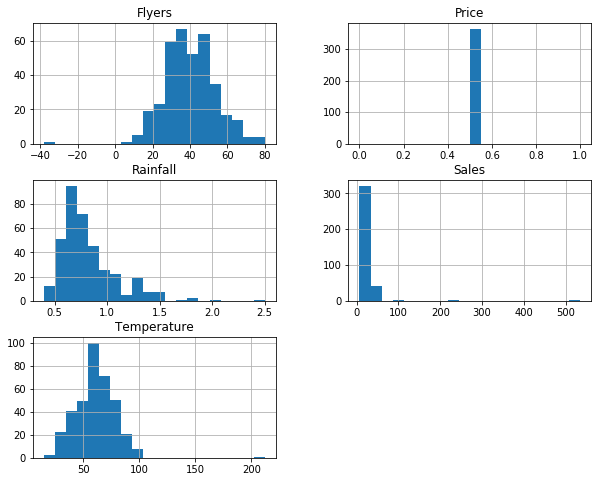

In [40]:
df.hist(figsize=(10,8), bins = 20)
plt.show()

In [23]:
# Semi Normally distributed columns are flyers, Rainfall, and Temperature

In [24]:
df_mean = df.mean()
df_std = df.std()
display(df_mean)
display(df_std)

Temperature    61.224658
Rainfall        0.825973
Flyers         40.104110
Price           0.500000
Sales          27.589041
dtype: float64

Temperature    18.085892
Rainfall        0.273890
Flyers         13.786445
Price           0.000000
Sales          29.979680
dtype: float64

In [25]:
cutoff = df_std * 2
cutoff

Temperature    36.171785
Rainfall        0.547781
Flyers         27.572889
Price           0.000000
Sales          59.959360
dtype: float64

In [26]:
lower = cutoff - df_mean
lower 

Temperature   -25.052873
Rainfall       -0.278192
Flyers        -12.531220
Price          -0.500000
Sales          32.370318
dtype: float64

In [27]:
upper = cutoff + df_mean

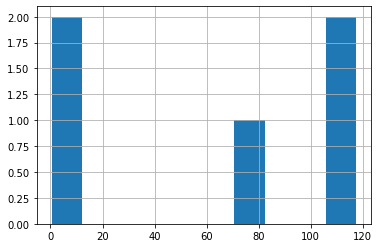

In [72]:
upper.hist()

3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [28]:
df_mean = df.mean()
df_std = df.std()
display(df_mean)
display(df_std)

Temperature    61.224658
Rainfall        0.825973
Flyers         40.104110
Price           0.500000
Sales          27.589041
dtype: float64

Temperature    18.085892
Rainfall        0.273890
Flyers         13.786445
Price           0.000000
Sales          29.979680
dtype: float64

In [29]:
cutoff = df_std * 3
cutoff

Temperature    54.257677
Rainfall        0.821671
Flyers         41.359334
Price           0.000000
Sales          89.939039
dtype: float64

In [30]:
lower = cutoff - df_mean
lower

Temperature    -6.966981
Rainfall       -0.004302
Flyers          1.255224
Price          -0.500000
Sales          62.349998
dtype: float64

In [31]:
upper = cutoff + df_mean
upper

Temperature    115.482334
Rainfall         1.647643
Flyers          81.463443
Price            0.500000
Sales          117.528080
dtype: float64

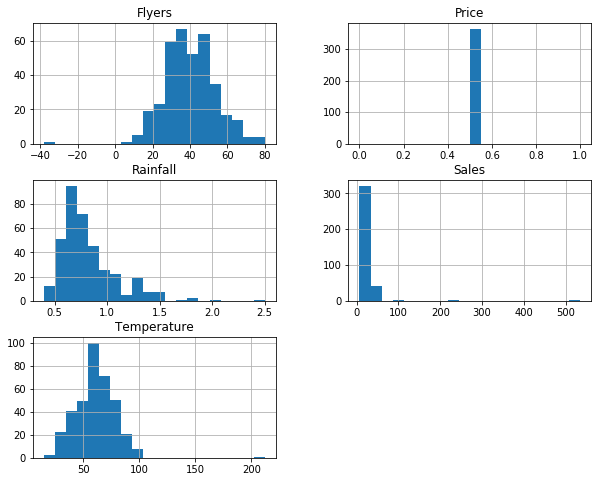

In [43]:
df.hist(figsize=(10,8), bins=20)
plt.show()